In [1]:
from __future__ import print_function, division
import os
import random
import torch
import pandas as pd
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import PIL

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.transforms.functional as Ft

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Defining transformation on data

In [2]:
transform = transforms.Compose([
    transforms.ToPILImage(mode=None),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(90, translate=None, scale=[0.95, 1.05], shear=5, resample=PIL.Image.BICUBIC, fillcolor=0),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.ToTensor()
])

target_transform = transforms.Compose([
    transforms.ToPILImage(mode=None),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomAffine(90, translate=None, scale=[0.95, 1.05], shear=5, resample=PIL.Image.BICUBIC, fillcolor=0),
    transforms.ToTensor()
])

# Creating dataset class

In [3]:
class FungiTileDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None, target_transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.tile_overview = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.tile_overview)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        input_img_fname = os.path.join(self.root_dir,self.tile_overview.loc[idx, "input_tile"])
        target_img_fname = os.path.join(self.root_dir,self.tile_overview.loc[idx, "target_tile"])
        
        
        input_img = io.imread(input_img_fname)
        target_img = io.imread(target_img_fname)
        
        # transformation
        transform_seed = np.random.randint(2147483640) # make a seed with numpy generator 
        if self.target_transform is not None:
            random.seed(transform_seed)
            torch.manual_seed(transform_seed)
            input_img = self.transform(input_img)
            
        if self.target_transform is not None:
            random.seed(transform_seed)
            torch.manual_seed(transform_seed)
            target_img = self.target_transform(target_img)
        
        sample = {'input': input_img, 'target': target_img}

        return sample
    
    def set_transform(self, transform, target_transform):
        
        self.transform = transform
        self.target_transform = target_transform
            
        

In [4]:
dataset = FungiTileDataset(csv_file = "processed_data/tiles/tile_overview.csv", 
                           root_dir = "processed_data/tiles/",
                           transform = transform, target_transform=target_transform)

# Testing dataloader

In [5]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

<Figure size 432x288 with 0 Axes>

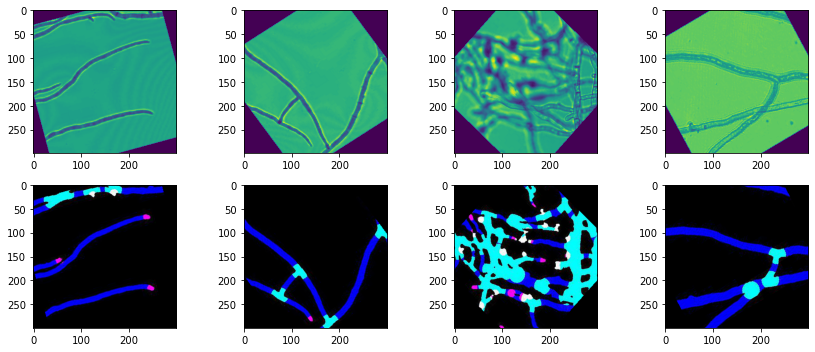

In [13]:
for i_batch, sample_batched in enumerate(dataloader):
    plt.figure()
    f, ax = plt.subplots(2,4, figsize=[12,5])
    
    
    for i in range(4):
        ax[0,i].imshow(sample_batched["input"][i].squeeze().numpy())
        ax[1,i].imshow(sample_batched["target"][i].permute(1,2,0).numpy())
        
    break
    
plt.tight_layout()

It works!

In [7]:
len(dataloader)

122